# Diwali Sales Analysis

## Objective
Analyze sales data to identify high-revenue customer segments, top-performing states, and best-selling product categories in order to improve marketing and inventory decisions.


**Step 1**: Loading data files and python libraries 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [77]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)


In [70]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.shape

(11251, 15)

**The dataset contains 11251 rows and 15 columns**

**Step 2**:Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [90]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [12]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
df.dropna(inplace=True)

In [15]:
df['Amount']=df['Amount'].astype('int')

In [16]:
df['Amount'].dtypes

dtype('int64')

## Data Cleaning
- Removed unnecessary columns
- Removed missing values
- Checked data types


**Step3**: Analysis and Plots to make visualization easy

In [91]:
df['Revenue_per_Order'] = df['Amount'] / df['Orders']
df['High_Value_Customer'] = df['Amount'] > df['Amount'].mean()


## Feature Engineering
- Created Revenue_per_Order
- Created High_Value_Customer flag


In [92]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Revenue_per_Order', 'High_Value_Customer'],
      dtype='object')

In [72]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


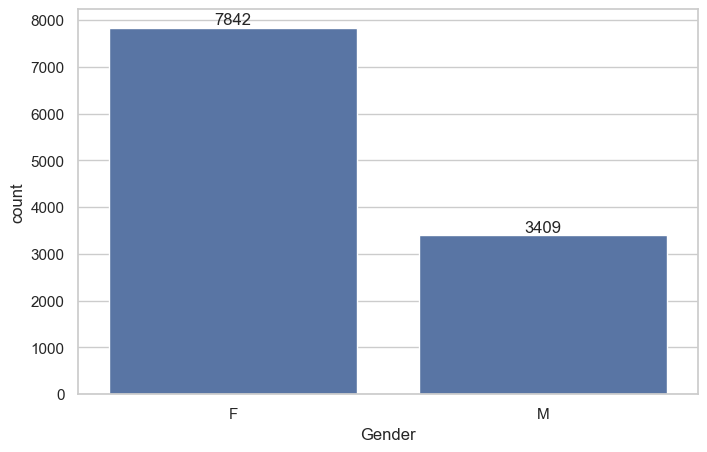

In [78]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

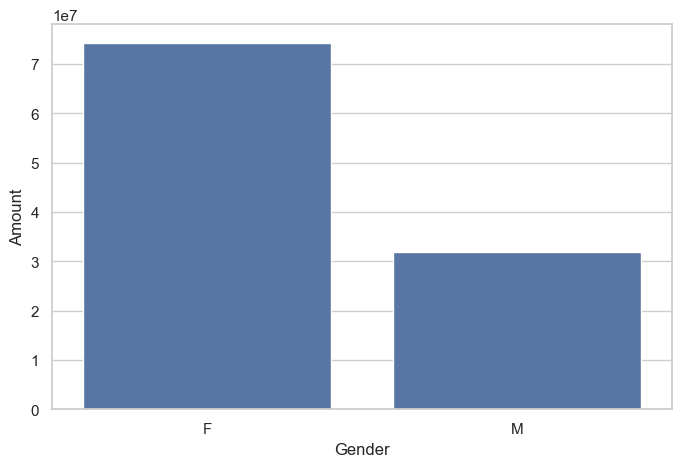

In [81]:
sales_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gender)

## Insight
Female customers contribute the majority of total revenue.


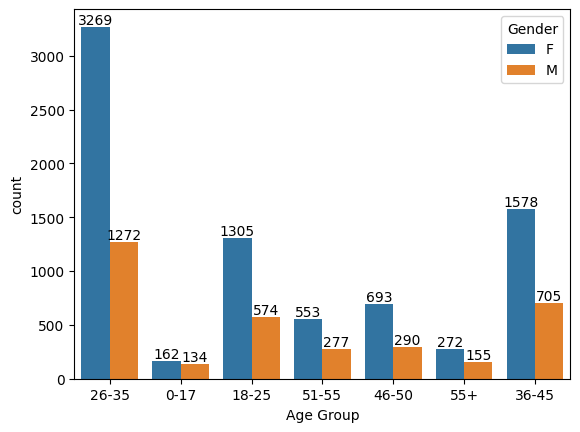

In [28]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

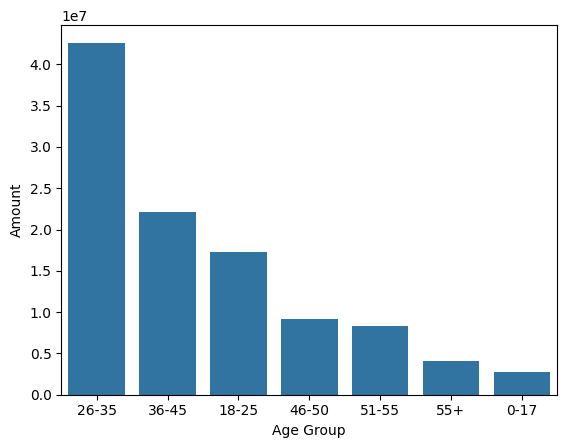

In [31]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

## Insight
Customers aged 26–35 generate the highest sales.


<Axes: xlabel='State', ylabel='Orders'>

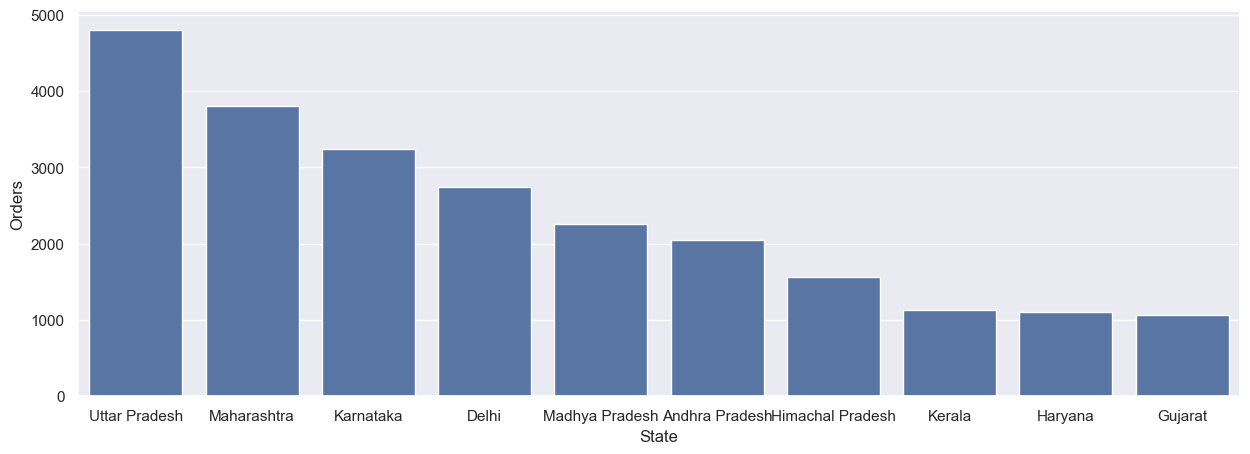

In [34]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

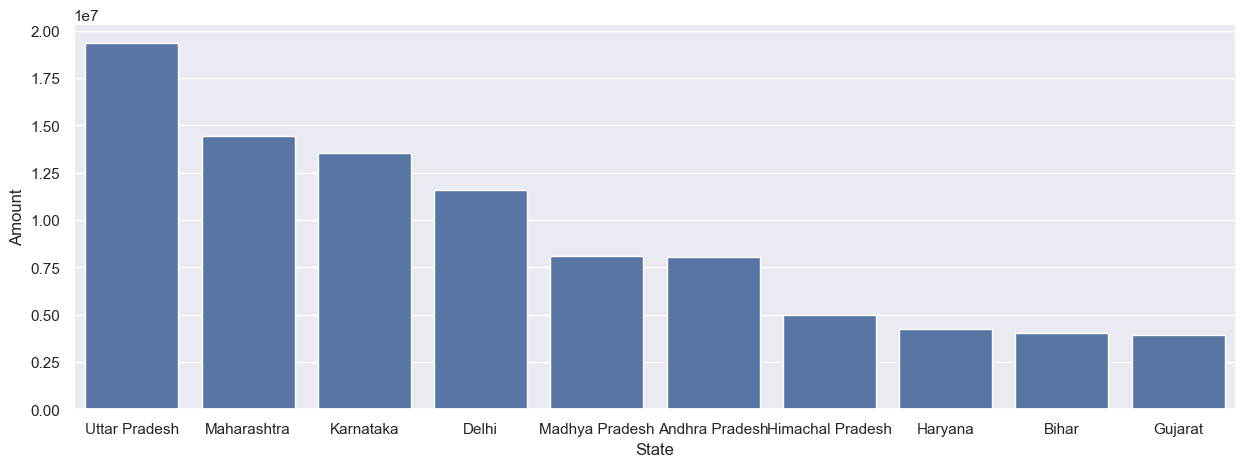

In [37]:
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount',data=sales_state)

## Insight
Top states UP,Maharashtra, karnataka contributing most of the revenue.


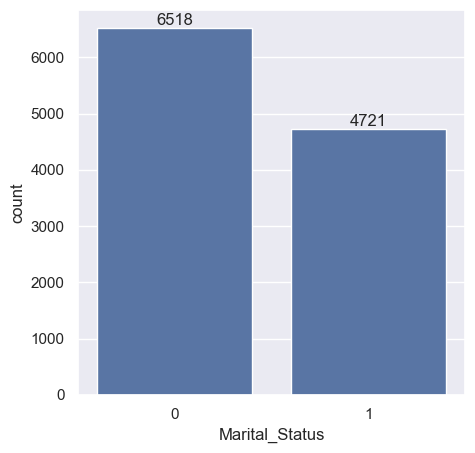

In [42]:
ax=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers: ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

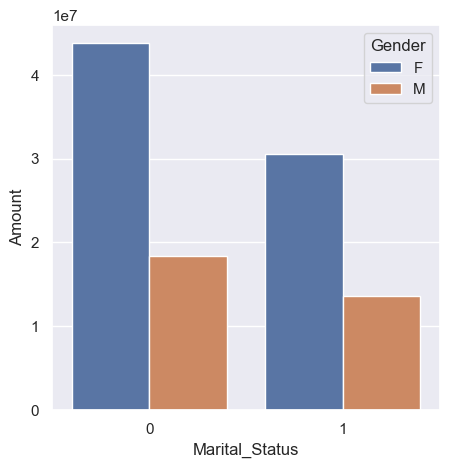

In [47]:
sales_Maritalstatus=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Marital_Status',y='Amount',data=sales_Maritalstatus,hue='Gender')

## Insight 
Married customers contribute a higher share of total revenue compared to unmarried customers.


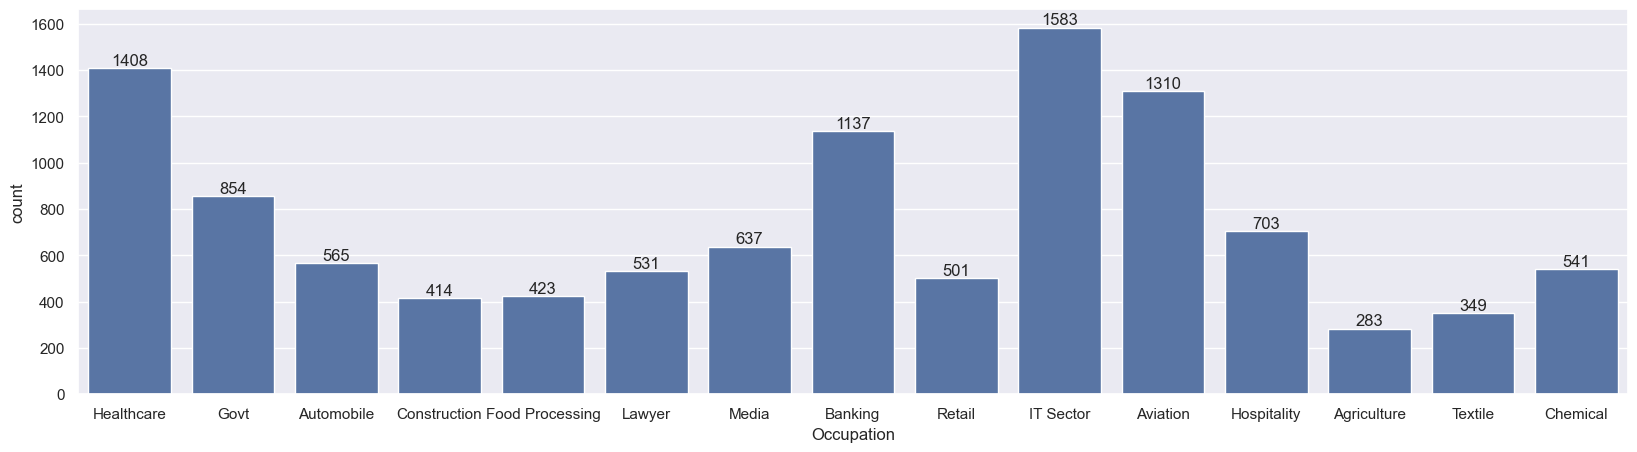

In [52]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

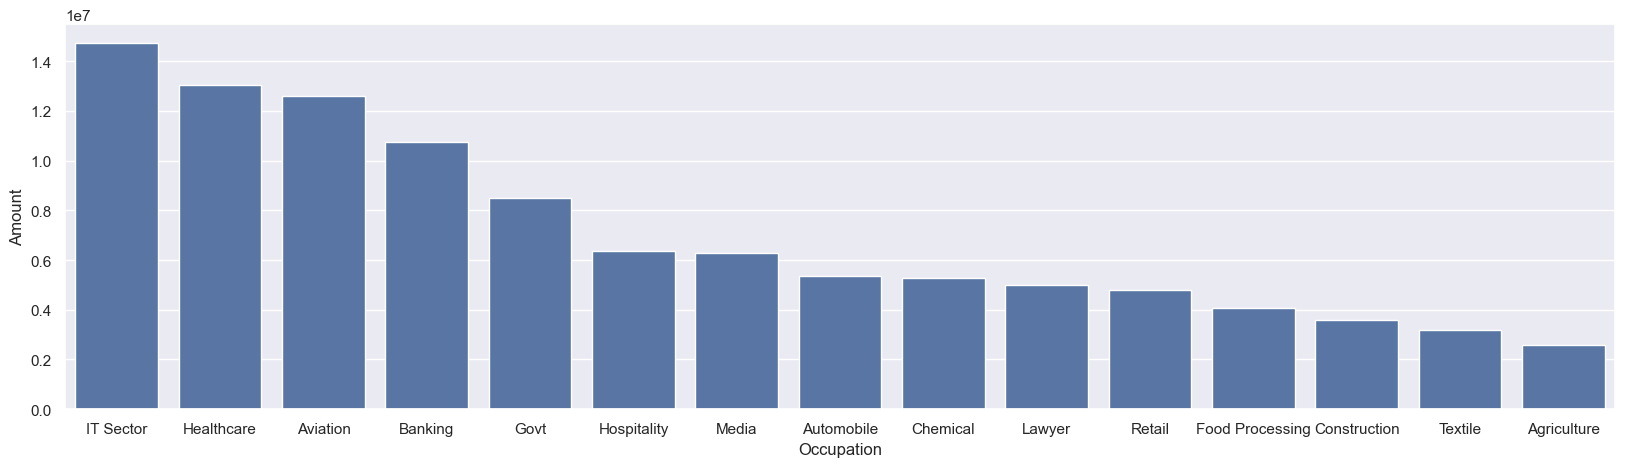

In [53]:
sales_occupation=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_occupation)

## Insight
Customers from IT, Healthcare, and Aviation sectors generate the highest revenue.


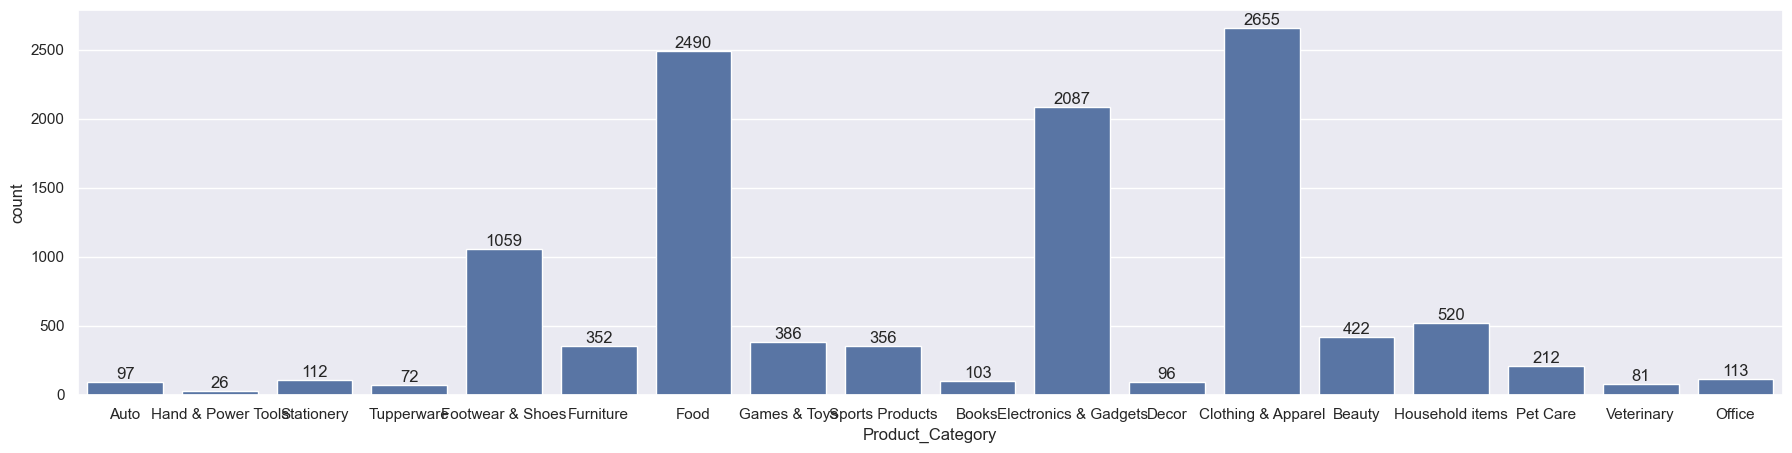

In [55]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

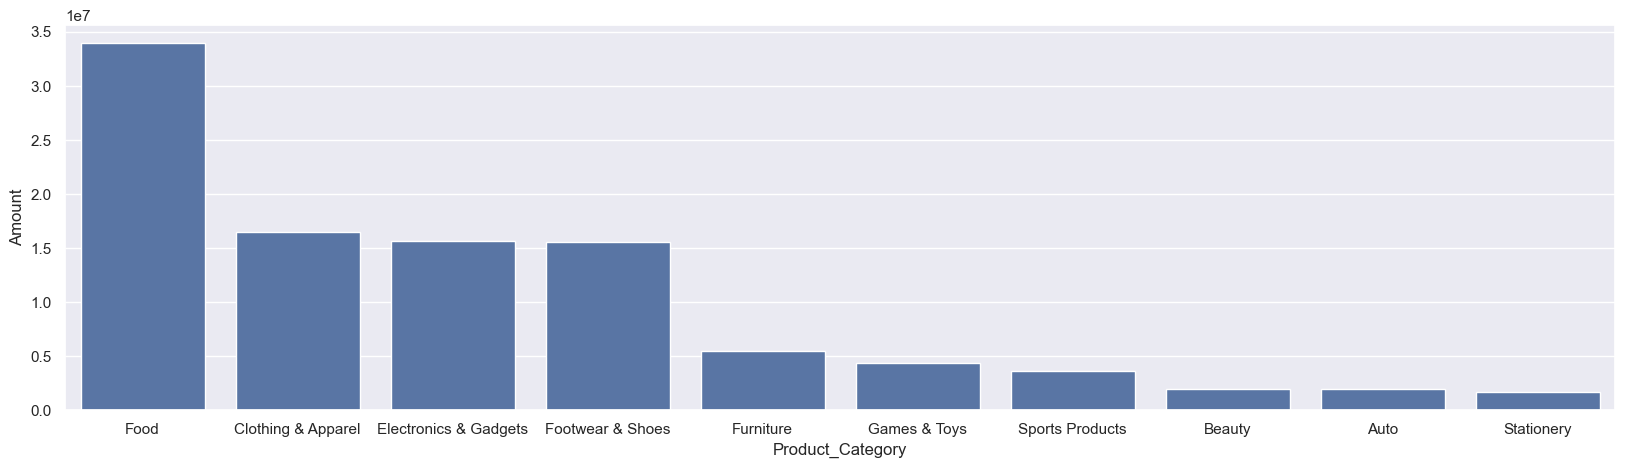

In [57]:
sales_category=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Amount',data=sales_category)

## Insight 
Food, Clothing, and Electronics dominate total sales revenue.


## Business Recommendations
- Target female customers aged 26–35
- Increase inventory for top categories
- Run promotions in top-performing states


## Conclusion
The analysis identified key customer segments and products that drive revenue. These insights can be used to improve marketing strategy and inventory planning.
